# Week 3

For this week we are going to look up some SciHub usage data and compare the usage from Toronto and Montreal. Every once in a while SciHub will publish anonymized usage data with some geographic information associated with it. Our task will be to evaluate that data to see if we can find any interesting comparisons.

Topics we'll be exploring

- The Pandas Library
- Graphing with MatplotLib

## Loading and exploring the data

In [14]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sci_hub_data = pandas.read_csv("week_3_sci_hub_worksheet.csv")
sci_hub_data

,timestamp,user_id,city,doi_whole,doi_prefix,doi_suffix
0,2015-12-01 00:00:45,56ed2b0e0d52f,Toronto,10.1016/j.memsci.2007.03.046,10.1016,j.memsci.2007.03.046
1,2015-12-01 00:01:32,56ed2c29a40f2,Montreal,10.1109/PES.2007.385969,10.1109,PES.2007.385969
2,2015-12-01 00:02:23,56ed2c29a40f2,Montreal,10.1109/PSC.2014.6808094,10.1109,PSC.2014.6808094
3,2015-12-01 00:03:00,56ed2c29a40f2,Montreal,10.1109/PSC.2014.6808094,10.1109,PSC.2014.6808094
4,2015-12-01 00:03:01,56ed2c29a40f2,Montreal,10.1007/978-3-642-30574-0_46,10.1007,978-3-642-30574-0_46
...,...,...,...,...,...,...
152977,2015-09-30 22:41:04,56ed2b3c9d668,Toronto,10.1111/petr.12212,10.1111,petr.12212
152978,2015-09-30 22:45:52,56ed2b3c0b270,Montreal,10.1142/S0217984914300014,10.1142,S0217984914300014
152979,2015-09-30 22:52:44,56ed2b4e34dd1,Toronto,10.1016/S0260-8774(03)00241-3,10.1016,S0260-8774(03)00241-3
152980,2015-09-30 22:52:46,56ed2b4e34dd1,Toronto,10.1080/10942910701233389,10.1080,10942910701233389


In [9]:
# weighting of dataset

sci_hub_data.groupby("city")["doi_whole"].count()

city
Montreal    135794
Toronto      17188
Name: doi_whole, dtype: int64

In [10]:
# unique publishers in data
sci_hub_data["doi_prefix"].nunique()

403

In [11]:
# unique users
sci_hub_data["user_id"].nunique()

3421

In [29]:
#Top 10 publishers in Toronto
sci_hub_data[sci_hub_data["city"] == "Toronto"].groupby("doi_prefix").count()

,timestamp,user_id,city,doi_whole,doi_suffix
doi_prefix,,,,,
10.0000,8,8,8,8,8
10.1001,223,223,223,223,223
10.1002,782,782,782,782,782
10.1006,47,47,47,47,47
10.1007,1665,1665,1665,1665,1665
...,...,...,...,...,...
10.7567,1,1,1,1,1
10.7589,1,1,1,1,1
10.7721,1,1,1,1,1


In [35]:
#Top 10 publishers in Montreal
sci_hub_data[sci_hub_data["city"] == "Montreal"].groupby("doi_prefix").count().sort_values(by='user_id',ascending=False).head(10)

,timestamp,user_id,city,doi_whole,doi_suffix
doi_prefix,,,,,
10.1016,49320,49320,49320,49320,49320
10.1109,24746,24746,24746,24746,24746
10.1007,14316,14316,14316,14316,14316
10.1021,7454,7454,7454,7454,7454
10.1080,6308,6308,6308,6308,6308
10.1002,5966,5966,5966,5966,5966
10.1038,3924,3924,3924,3924,3924
10.1111,2784,2784,2784,2784,2784
10.1039,2628,2628,2628,2628,2628


## Visualizing some results

In [18]:
#Let's create some list of info
toronto_users = sci_hub_data[sci_hub_data["city"] == "Toronto"]
montreal_users = sci_hub_data[sci_hub_data["city"] == "Montreal"]

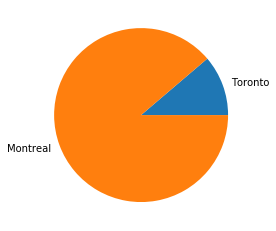

In [21]:

toronto_slice = toronto_users["user_id"].count()
montreal_slice = montreal_users["user_id"].count()

pie_data = [toronto_slice,montreal_slice]
pie_labels = ["Toronto","Montreal"]
plt.pie(pie_data,labels=pie_labels)
plt.show()

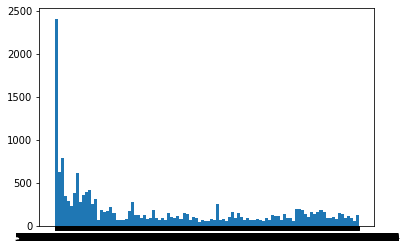

In [23]:
#histogram of download distribution in Toronto

bins = 100

plt.hist(toronto_users["user_id"],bins)


plt.show()
